In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [3]:
url='C:/Users/Asus/Desktop/python/ML/insurance.csv'
df=pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data Size

In [4]:
df.shape

(1338, 7)

#### Descriptive Analysis

In [5]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

#### Finding Correlation

In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Heatmap

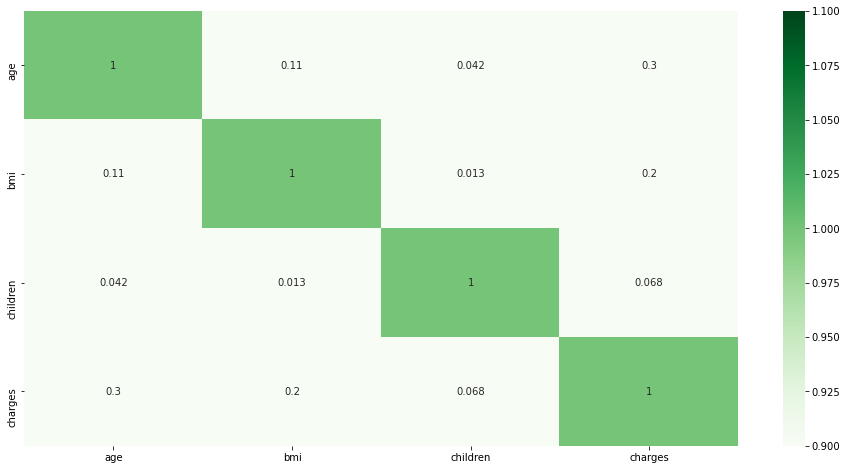

In [7]:
correlation = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, linewidths=0,vmin=1,cmap='Greens')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

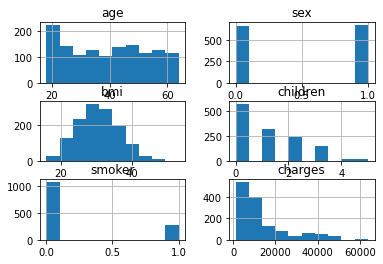

In [47]:
df.hist()

#### NUll Value Prediction

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Average Cost with distribution and Reg plot

In [9]:
AvgCost=df.groupby('age')['charges'].mean()
AvgCost

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

Text(0.5, 1.0, 'age vs charges')

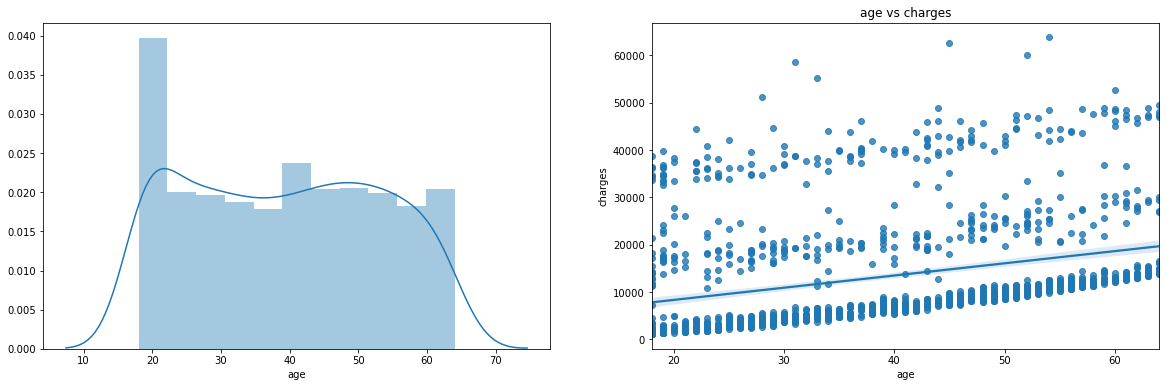

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.subplot(1,2,2)
sns.regplot(df['age'], df['charges'])
plt.title('age vs charges')

In [10]:
AvgCost=df.groupby('sex')['charges'].mean()
AvgCost


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

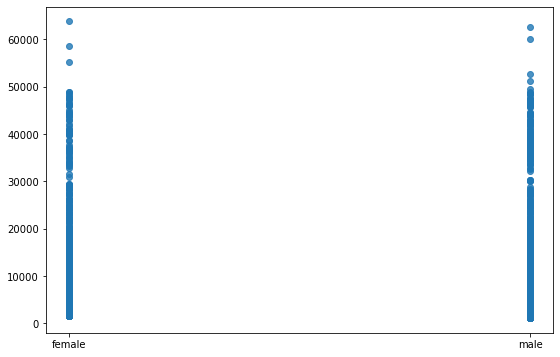

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.regplot(df['sex'], df['charges'])
plt.title('sex vs charges')

In [13]:
AvgCost=df.groupby('children')['charges'].mean()
AvgCost

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'children vs charges')

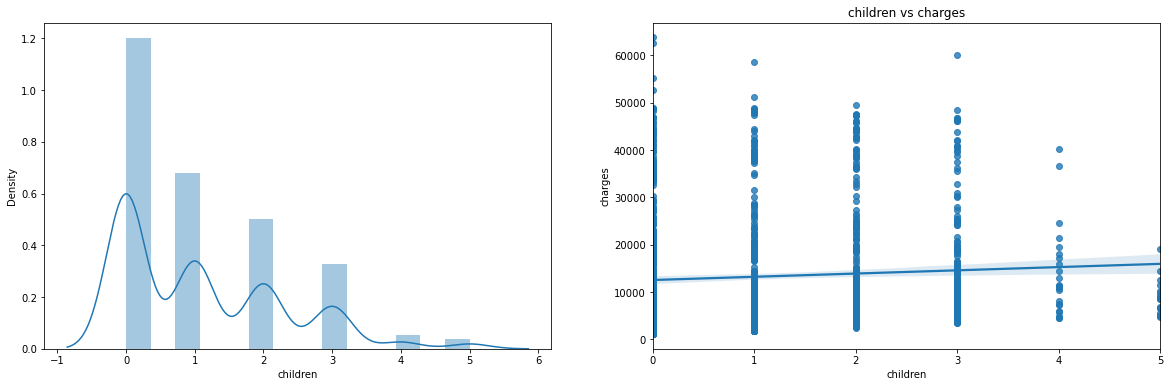

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['children'])
plt.subplot(1,2,2)
sns.regplot(df['children'], df['charges'])
plt.title('children vs charges')

In [14]:
AvgCost=df.groupby('bmi')['charges'].mean()
AvgCost

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

Text(0.5, 1.0, 'bmi vs charges')

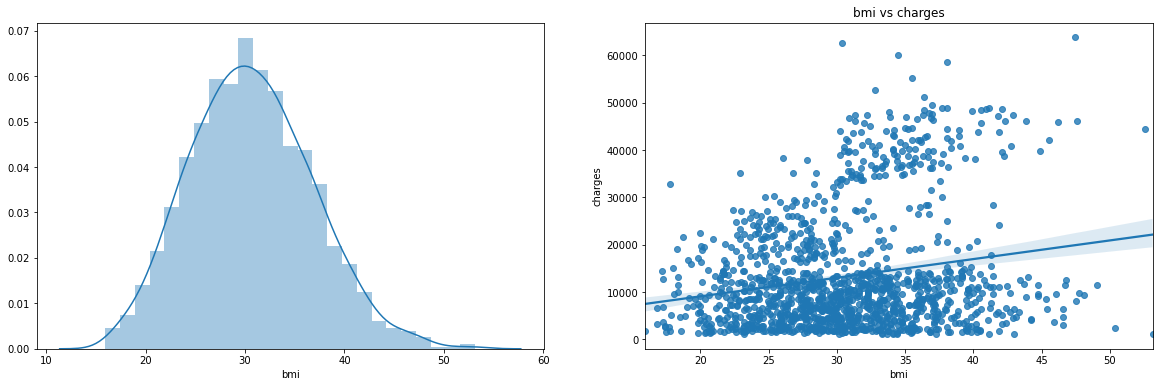

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['bmi'])
plt.subplot(1,2,2)
sns.regplot(df['bmi'], df['charges'])
plt.title('bmi vs charges')

In [15]:
AvgCost=df.groupby('smoker')['charges'].mean()
AvgCost

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [44]:
# plt.subplot(1,2,2)
# sns.regplot(df['smoker'], df['charges'])
# # plt.title('smoker vs charges')


#### Line plot Relationship Between age and BMI

Text(0.5, 1.0, 'Line Plot')

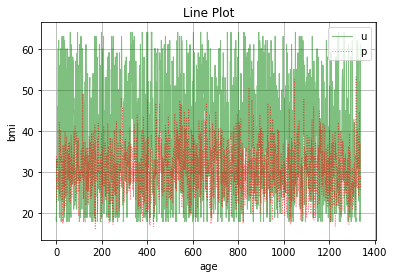

In [16]:
df.age.plot(kind='line', color='g', label='Age', linewidth=1, alpha=0.5, grid=True, linestyle='-')
df.bmi.plot(kind='line', color='r', label='BMI', linewidth=1, alpha=0.5, grid=True, linestyle=':')
plt.legend('upper left')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Line Plot')

#### Time series of age and bmi

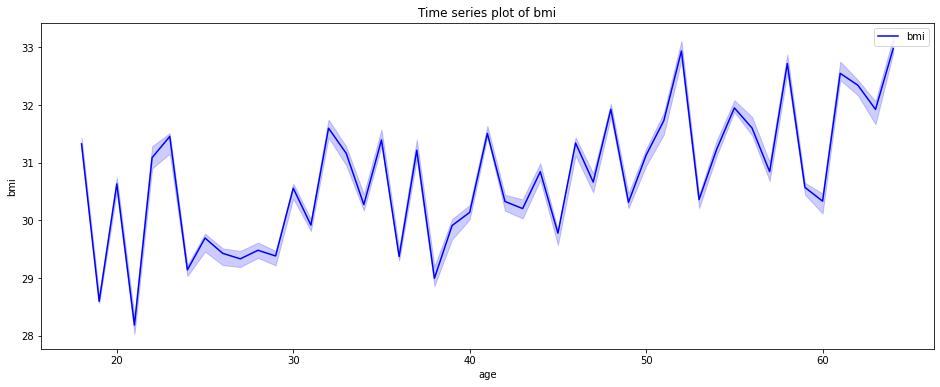

In [17]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of bmi')
ax = sns.lineplot(x="age", y="bmi",ci=10,color="blue", label="bmi",data=df)

#### Time series of age and charges

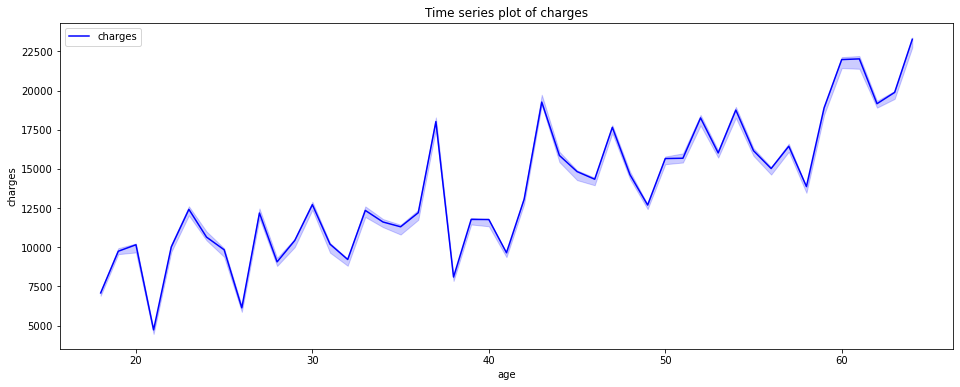

In [18]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of charges')
ax = sns.lineplot(x="age", y="charges",ci=10,color="blue", label="charges",data=df)

#### Histogram

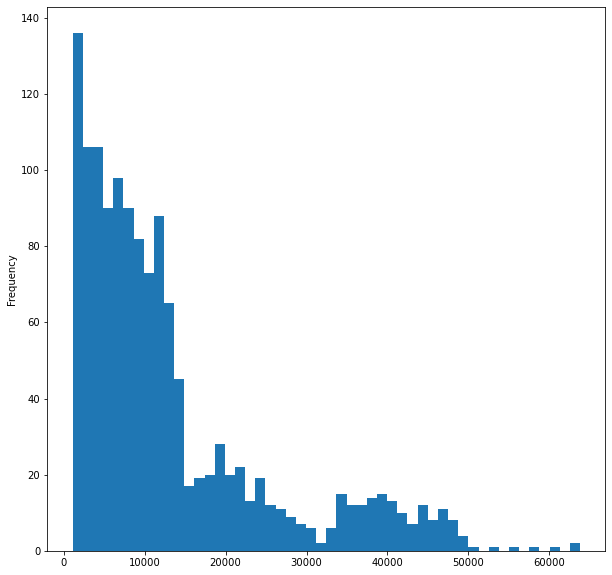

In [19]:
df.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

#### Counting Male and Female

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

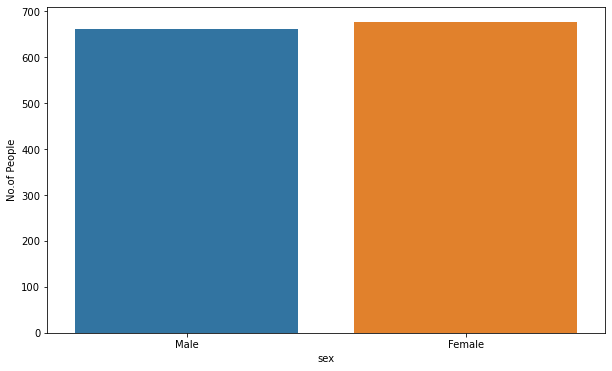

In [20]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(df["sex"])
plt.ylabel("No.of People")
ax.set_xticklabels(['Male', 'Female'])

In [ ]:
#### No of male is less than the female among the no of people in the data

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'yes'), Text(1, 0, 'no')]

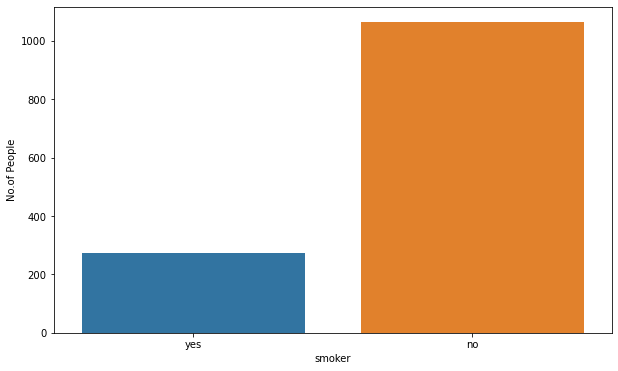

In [21]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(df["smoker"])
plt.ylabel("No.of People")
ax.set_xticklabels(['yes', 'no'])

In [ ]:
#### No. of non smoker is greater than the smoker

#### Father of smoker

In [22]:
data=(df['sex']=='male') & (df['smoker']=='yes') & (df['children']>0)
df[data]

,age,sex,bmi,children,smoker,region,charges
29,31,male,36.300,2,yes,southwest,38711.00000
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
49,36,male,35.200,1,yes,southeast,38709.17600
52,48,male,28.000,1,yes,southwest,23568.27200
...,...,...,...,...,...,...,...
1284,61,male,36.300,1,yes,southwest,47403.88000
1288,20,male,39.400,2,yes,southwest,38344.56600
1301,62,male,30.875,3,yes,northwest,46718.16325
1304,42,male,24.605,2,yes,northeast,21259.37795


In [ ]:
''''''
##### means 97 male people are the fathers of the smokers
''''''

#### Mother of Smoker

In [23]:
data=(df['sex']=='Female') & (df['smoker']=='yes') & (df['children']>0)
df[data]

,age,sex,bmi,children,smoker,region,charges


#### Boxplot

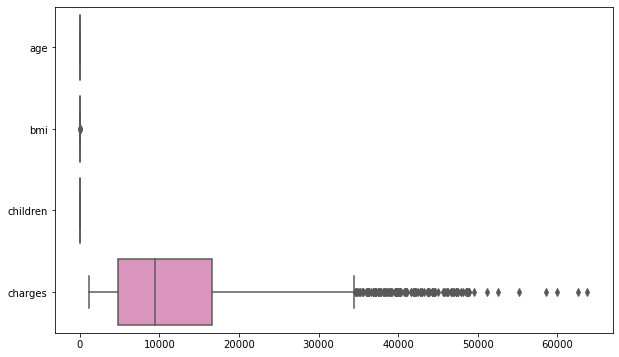

In [24]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

#### Boxplot of age and charges

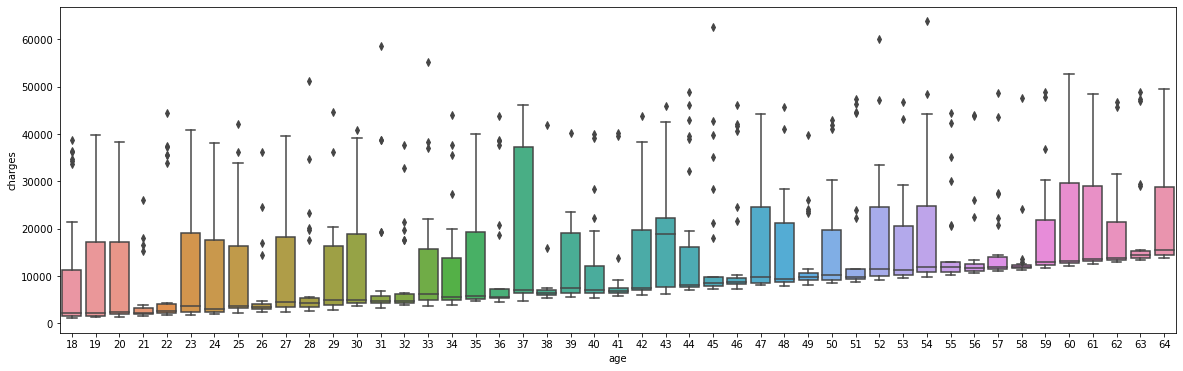

In [25]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x="age", y="charges", data=df)

#### Box plot of age and children

<AxesSubplot:title={'center':'age'}, xlabel='children'>

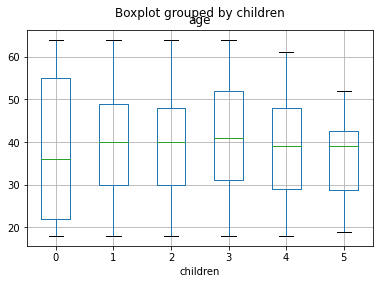

In [26]:
df.boxplot(column='age',by = 'children')

#### Data of region

In [27]:
print(df.region.value_counts(dropna = False))

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


#### Smoker at southwest

In [28]:
data=(df['region']=='southwest') & (df['smoker']=='yes') 
df[data]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
19,30,male,35.3,0,yes,southwest,36837.46700
29,31,male,36.3,2,yes,southwest,38711.00000
30,22,male,35.6,0,yes,southwest,35585.57600
34,28,male,36.4,1,yes,southwest,51194.55914
39,60,male,39.9,0,yes,southwest,48173.36100
52,48,male,28.0,1,yes,southwest,23568.27200
84,37,female,34.8,2,yes,southwest,39836.51900
94,64,female,31.3,2,yes,southwest,47291.05500
99,38,male,19.3,0,yes,southwest,15820.69900


#### Smoker at northeast

In [30]:
data=(df['region']=='northwest') & (df['smoker']=='yes') 
df[data]

,age,sex,bmi,children,smoker,region,charges
55,58,male,36.955,2,yes,northwest,47496.49445
64,20,female,22.420,0,yes,northwest,14711.74380
85,45,male,22.895,2,yes,northwest,21098.55405
86,57,female,31.160,0,yes,northwest,43578.93940
105,20,male,28.025,1,yes,northwest,17560.37975
128,32,female,17.765,2,yes,northwest,32734.18630
144,30,male,28.690,3,yes,northwest,20745.98910
146,46,male,30.495,3,yes,northwest,40720.55105
160,42,female,26.600,0,yes,northwest,21348.70600
238,19,male,29.070,0,yes,northwest,17352.68030


In [ ]:
#### northwest has the higher smoker

#### Data Transformation 

We will convert the categorial values to 0 and 1 because the machine will not take any categorial data. You need to replace it with some common method, however, in that case I have converted the categorial variables to 0 and 1, but when we experience numerous categorial variables, we need to apply a hot encoding. Let's get back to the base. 

In [29]:
d1 = {'male': 1, 'female': 0}
df['sex'] = df['sex'].map(d1)


In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [36]:
d2 = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(d2)


In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#### Define the independent and dependent variable 

In [38]:
features=['age', 'sex', 'children', 'smoker']
X= df[features]
y= df['charges']

#### Train test split

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#### Machine Learning Model 

#### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

75.7938493475933

In [44]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Find out the Error of the model

In [46]:
predictions = linreg.predict(X_test)
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(X_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [  273.84410787    56.9291132    406.71013031 23662.57118166]
Intercept: -2776.375113130338
MAE: 3921.5552885201178
MSE: 37579741.83084907
RMSE: 6130.231792587379
AccuracyII: 75.7938493475933 %
R2: 0.757938493475933


#### Logistic Regression

In [53]:
# from sklearn.linear_model import LogisticRegression
# logreg=LogisticRegression()
# logreg.fit(X_train, y_train)
# logreg_score = (logreg.score(X_test, y_test))*100
# logreg_score

ValueError: Expected 2D array, got 1D array instead:
array=[ 9193.8385   8534.6718  27117.99378 ... 11931.12525 46113.511
 10214.636  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.